In [115]:
import warnings
warnings.filterwarnings("ignore")

# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [116]:
# Load in the dataframe
df = pd.read_csv("dataset_komentar_instagram_cyberbullying.csv", index_col=0)

In [117]:
df.head()

,Sentiment,Instagram Comment Text
Id,,
1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
2,negative,Geblek lo tata...cowo bgt dibela2in balikan......
3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."


In [118]:
df.rename(columns={'Instagram Comment Text': 'Comment'}, inplace=True)
df.head()

,Sentiment,Comment
Id,,
1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
2,negative,Geblek lo tata...cowo bgt dibela2in balikan......
3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."


In [119]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} types of Comments in this dataset such as {}. \n".format(len(df.Sentiment.unique()), 
                                                                           ", ".join(df.Sentiment.unique())))

There are 400 observations and 2 features in this dataset. 

There are 2 types of Comments in this dataset such as negative, positive. 



In [120]:
# Summary statistic of all Instagram Comment
df.describe().head()

,Sentiment,Comment
count,400,400
unique,2,397
top,positive,"<USERNAME> ini lagi pemikiran manusia bodoh, ..."
freq,200,2


 <USERNAME> TOLOL!! Gak ada hubungan nya keguguran dgn pake hijab syar'i yg lo bilang bayi nya kepanasan didalem gak ada hubungan nya woyyyy!! Otak sama jempol lo gak singkron sih ya jadinya asal nulis komentar!


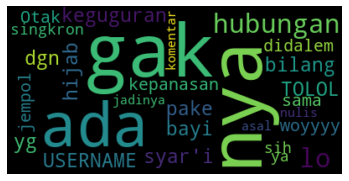

In [121]:
# Start with one review:
text = df.Comment[1]
print(text)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# # Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

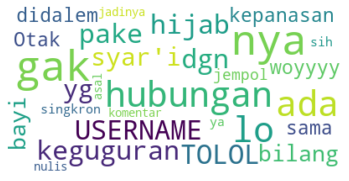

In [122]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [123]:
# Save the image in the img folder:
wordcloud.to_file("first_review.png")

In [124]:
text = " ".join(review for review in df.Comment)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 59543 words in the combination of all review.


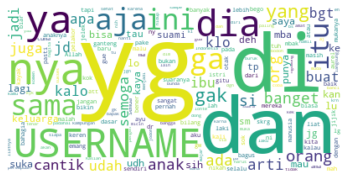

In [125]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["negative", "positive"])

# # Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# # Display the generated image:
# # the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [130]:
insta_mask = np.array(Image.open("insta.png"))
insta_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [129]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [131]:
# Transform your mask into a new one that will work with the function:
transformed_insta_mask = np.ndarray((insta_mask.shape[0],insta_mask.shape[1]), np.int32)

for i in range(len(insta_mask)):
    transformed_insta_mask[i] = list(map(transform_format, insta_mask[i]))

In [132]:
# Check the expected result of your mask
transformed_insta_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

In [133]:
transformed_insta_mask.shape

(1000, 1000)

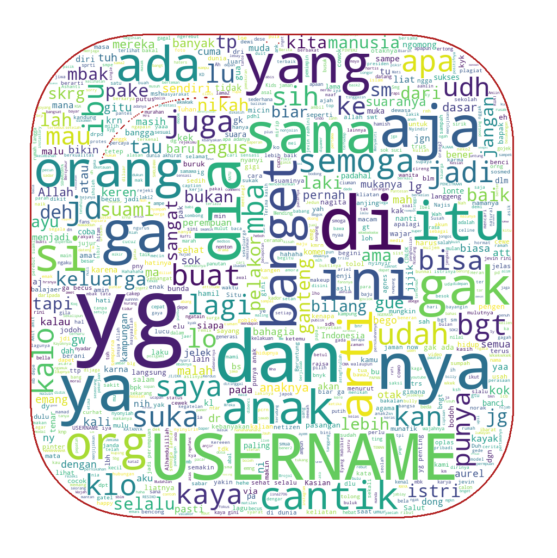

In [134]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_insta_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("insta.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [135]:
# Join all reviews of each Sentiment:
negative = " ".join(review for review in df[df["Sentiment"]=="negative"].Comment)
positive = " ".join(review for review in df[df["Sentiment"]=="positive"].Comment)

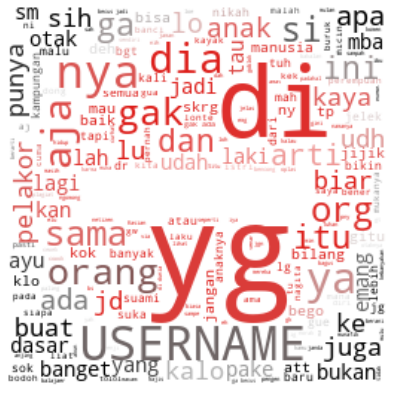

In [136]:
# Generate a word cloud image
mask = np.array(Image.open("negative.jpg"))
wordcloud_usa = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(negative)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("negative_comment.png", format="png")

plt.show()

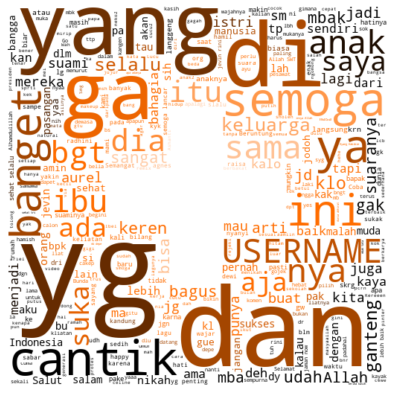

In [137]:
# Generate a word cloud image
mask = np.array(Image.open("positive.png"))
wordcloud_fra = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(positive)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_fra.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("positive_commment.png", format="png")

#plt.show()